## Visualization of the Saponification Process 

Saponification is the chemical reaction which happens when an acid is mixed with a base in order to form a salt.
So during soap making (using the cold method) we mix oil (our acid) with Lye (our base) and form soap (the salt).

The saponification is a crucial process during the soap making and keeping the temperature and humidity profiles under control is decisive for the quality of the soap itself. The saponification is an exothermic reaction and the heat produced should not be easily released in the environment. So usually the soap is wrapped in a thick blanket or kept within some box with proper isolation. 

The aim of the code below, is to read the raw temperature and humidity data that collected during a saponification process, align them and plot them so we can have a better understanding of their evolution.

<img src="pics/soap.jpg", >

## Experimental Setup

The experimental setup includes two kind of measurements:
- environ sensors in the environment (inside and outside the box) around the soap.
- probe sensor inside the soap itself.

<img src="pics/experimental_setup.png", >

In [1]:
#necessary libs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## Collect Raw Data

In [73]:
netatmo_in = pd.read_csv('data/netatmo_inside_box.csv', delimiter=';')
netatmo_in.index = pd.to_datetime(netatmo_in['datetime'])

netatmo_ambient = pd.read_csv('data/netatmo_ambient_station.csv', delimiter=';')
netatmo_ambient.index = pd.to_datetime(netatmo_ambient['datetime'])

netatmo_out = pd.read_csv('data/netatmo_outside_box.csv', delimiter=';')
netatmo_out.index = pd.to_datetime(netatmo_out['datetime'])

probe = pd.read_csv('data/probe_data.csv')
probe.index = pd.to_datetime(probe['timestamp'])

# resample the time series
netatmo_in = netatmo_in.resample('5Min').mean().reset_index()
netatmo_out = netatmo_out.resample('5Min').mean().reset_index()
netatmo_ambient = netatmo_ambient.resample('5Min').mean().reset_index()
probe = probe.resample('5Min').mean().reset_index()


In [74]:
temp = netatmo_in[['datetime', 'Temperature']].rename(columns={'Temperature': 'T [in-box]'})\
    .join(netatmo_out[['Temperature']].rename(columns={'Temperature': 'T [out-box]'}),  how='inner')\
    .join(netatmo_ambient[['Temperature']].rename(columns={'Temperature': 'T [ambient]'}),  how='inner')\
    .join(probe[['Temperature']].rename(columns={'Temperature': 'T [probe]'}),  how='inner')\

In [75]:
temp.head(3)

,datetime,T [in-box],T [out-box],T [ambient],T [probe]
0,2017-12-14 13:00:00,22.8,22.8,22.2,22.95
1,2017-12-14 13:05:00,22.9,22.8,22.2,23.08
2,2017-12-14 13:10:00,23.1,23.1,22.2,23.16


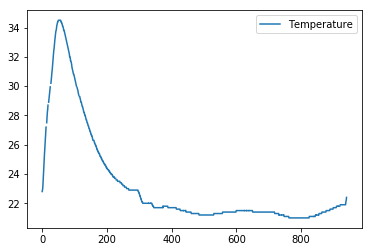

In [29]:
netatmo_in[['Temperature']].plot()

In [76]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [77]:
#T [in-box] 	T [out-box] 	T [ambient] 	T [probe]

trace_in = go.Scatter(x=temp.index, y=temp['T [in-box]'], name = "T [in-box]", line = dict(color = 'red'), opacity = 0.8)
trace_out = go.Scatter(x=temp.index, y=temp['T [out-box]'], name = "T [out-box]", line = dict(color = 'red'), opacity = 0.8)
trace_ambient = go.Scatter(x=temp.index, y=temp['T [ambient]'], name = "T [ambient]", line = dict(color = 'red'), opacity = 0.8)
trace_probe = go.Scatter(x=temp.index, y=temp['T [probe]'], name = "T [probe]", line = dict(color = 'red'), opacity = 0.8)

#temp_data = [trace_in]
temp_data = [trace_in, trace_out, trace_ambient, trace_probe]

layout = dict(
    title = "Manually Set Date Range",
    xaxis = dict(
        range = ['2016-07-01',
                 '2016-12-31'])
)

fig = dict(data=temp_data, layout=layout)
iplot(fig, filename = "Manually Set Range")